What is your gender (F or M)? F
How old are you? 26
How much do you weigh in pounds? 135
How tall are you in inches? 66
Your caloric balance is starting at -1430.25 
 
What would you like to do?
[f] Record Food Consumption
[a] Record Physical Activity
[q] Quit
Enter an option: f
How many calories did you eat? 2000
Your caloric balance is now at 569.75 
 
What would you like to do?
[f] Record Food Consumption
[a] Record Physical Activity
[q] Quit
Enter an option: a
Choose an activity to record:
[b] Basketball
[j] Jump Rope
[r] Running
[w] Walking
[t] Weight Training
[q] Quit to Main Menu
Enter an option: r
how long did you perform this activity in minutes? 60
Your caloric balance is now at -199.75 
 
What would you like to do?
[f] Record Food Consumption
[a] Record Physical Activity
[q] Quit
Enter an option: q
Here is your caloric balance history!


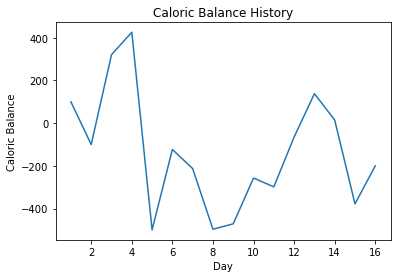

In [2]:
"""Imports the calorie calss from the file calorie.py and also imports sqlite to use a database
and matplot lib to create a graph"""
from calorie import Calorie
from caloriedb import Database
import matplotlib.pyplot as plt
%matplotlib inline

def menu():
    """the main menu of the program"""
    print ("What would you like to do?")
    print ("[f] Record Food Consumption")
    print ("[a] Record Physical Activity")
    print ("[q] Quit")
    ans = input("Enter an option: ")
    #using a while loop to avoid crashes
    while ans.lower() != "f" and ans.lower() != "a" and ans.lower() != "q":
        print (ans, "is not a valid option.")
        ans = input("Enter an option: ")
    return ans

def activity_menu():
    """menu for recording an activity"""
    print ("Choose an activity to record:")
    print ("[b] Basketball")
    print ("[j] Jump Rope")
    print ("[r] Running")
    print ("[w] Walking")
    print ("[t] Weight Training")
    print ("[q] Quit to Main Menu")
    ans = input("Enter an option: ")
    #using a while loop to avoid crashes
    while ans.lower() != "b" and ans.lower() != "j" and ans.lower() != "r" and ans.lower() != "w" and ans.lower() != "t" and ans.lower() != "q":
        print (ans, "is not a valid option.")
        ans = input("Enter an option: ")
    return ans

def create_calorie(cal):
    """gets information from the user"""
    gender = cal.set_gender()
    age = cal.set_age()
    weight = cal.set_weight()
    height = cal.set_height()
    balance = cal.set_balance(gender, height, weight, age)
    print ("Your caloric balance is starting at", balance, "\n ")
    return cal

def create_graph(db):
    """creates a graph of the user's daily caloric intake"""
    info = db.get_info()
    x= []
    y = []
    for item in info:
        x.append(item[0])
        y.append(item[1])
    plt.title("Caloric Balance History")
    plt.xlabel("Day")
    plt.ylabel("Caloric Balance")
    plt.plot(x,y)

def main():
    """main function that runs the program."""
    cal = Calorie()
    create_calorie(cal)
    run = menu()
    while run.lower() != "q":
        if run.lower() == "f":
            amount = input("How many calories did you eat? ")
            cal.eat(amount)
            balance = cal.get_balance()
            print ("Your caloric balance is now at", balance, "\n ")
            run = menu()
        elif run.lower() == "a":
            print
            choice = activity_menu()
            if choice.lower() == "b":
                cal.basketball(cal.get_weight())
                balance = cal.get_balance()
                print ("Your caloric balance is now at", balance, "\n ")
                run = menu()
            elif choice.lower() == "j":
                cal.jump_rope(cal.get_weight())
                balance = cal.get_balance()
                print ("Your caloric balance is now at", balance, "\n ")
                run = menu()
            elif choice.lower() == "r":
                cal.running(cal.get_weight())
                balance = cal.get_balance()
                print ("Your caloric balance is now at", balance, "\n ")
                run = menu()
            elif choice.lower() == "w":
                cal.walking(cal.get_weight())
                balance = cal.get_balance()
                print ("Your caloric balance is now at", balance, "\n ")
                run = menu()
            elif choice.lower() == "t":
                cal.weight_training(cal.get_weight())
                balance = cal.get_balance()
                print ("Your caloric balance is now at", balance, "\n ")
                run = menu()
            else:
                run = menu()
    database = Database()
    database.updatedb(cal.get_balance())
    print ("Here is your caloric balance history!")
    create_graph(database)
    database.close_db()


main()
